Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [ ]:
import numpy as np
import itertools
import math

def get_cm_score(cm)
    return np.sum(cm) - np.trace(cm)

def get_best_matrix(cm, dim):
    best = math.inf
    best_matrix = []
    for eachPerm in list(itertools.permutations(range(0, dim))):
        copy = cm.copy()
        for i in range(0, dim):
            copy[i] = cm[eachPerm[i]]
        score = get_cm_score(copy)
        if score < best:
            best = score
            best_matrix = copy.copy()

    return best_matrix

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

hello
<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


Smallest k-means inertia value: 924.3159961688092


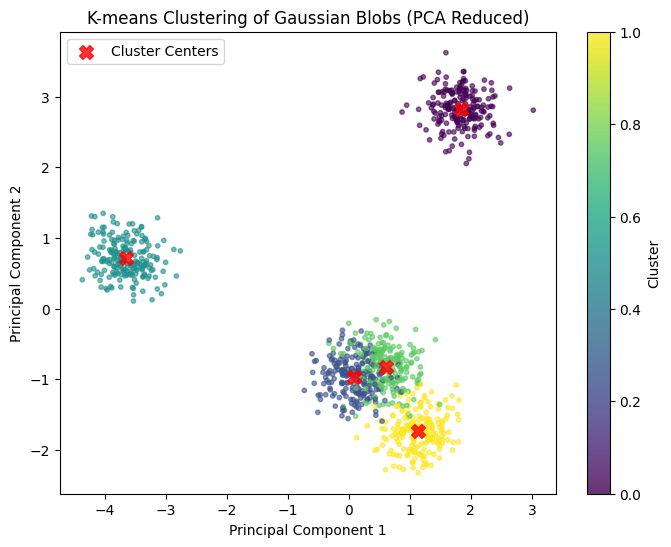

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, random_state=1, n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

print(f"Smallest k-means inertia value: {kmeans.inertia_}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=10, cmap='viridis', alpha=0.6)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=100, alpha=0.8, marker='X', label='Cluster Centers')
plt.title('K-means Clustering of Gaussian Blobs (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

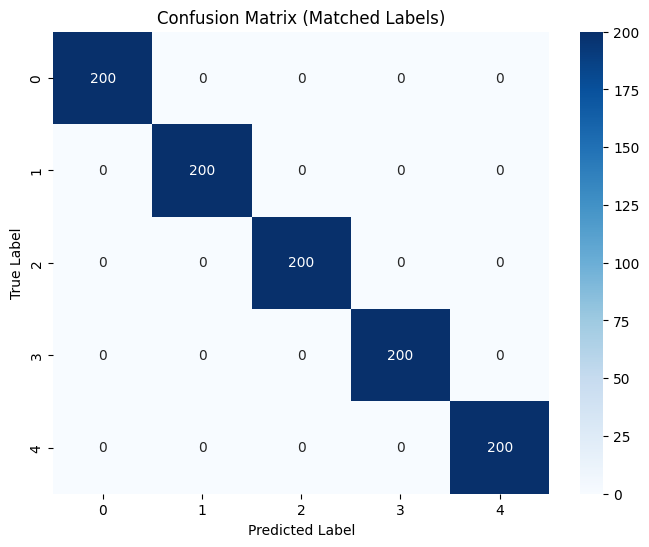

In [ ]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = get_best_matrix(confusion_matrix(y_true, y_pred), 5)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Matched Labels)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

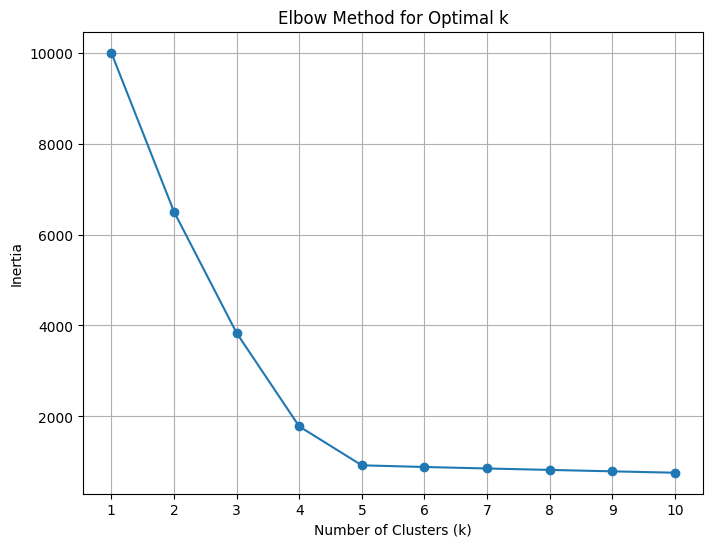

In [ ]:
distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# 2. Clustering Fashion-MNIST using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


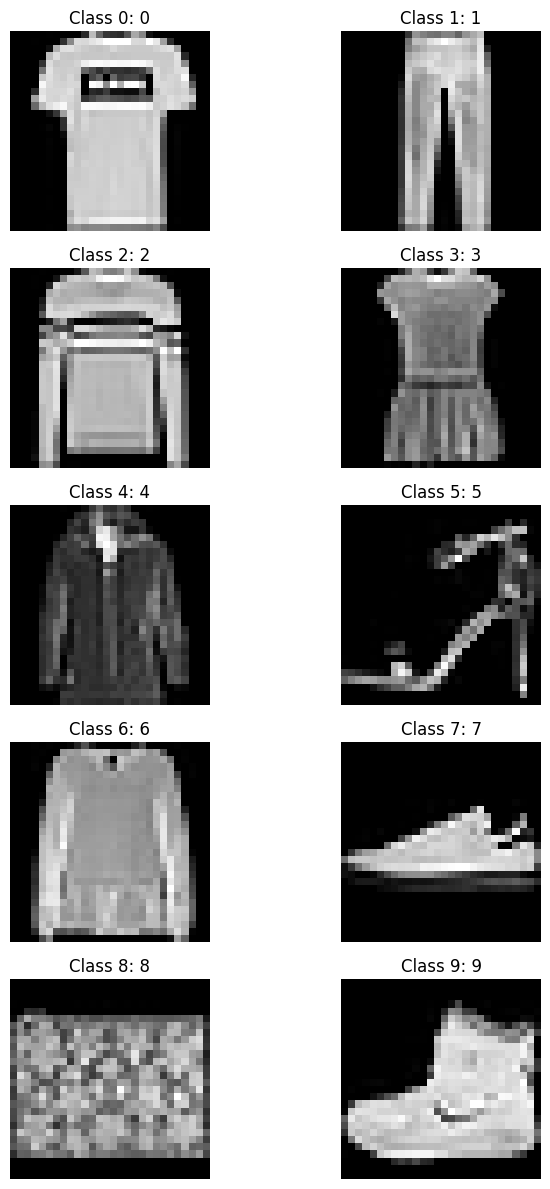

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(8, 12))
axes = axes.flatten()

num_classes = 10
class_indices = [np.where(y == i)[0][0] for i in range(num_classes)]

for i, ax in enumerate(axes):
    img = X[class_indices[i]].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Class {i}: {y[class_indices[i]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

K-means inertia value: 22175457.545010243


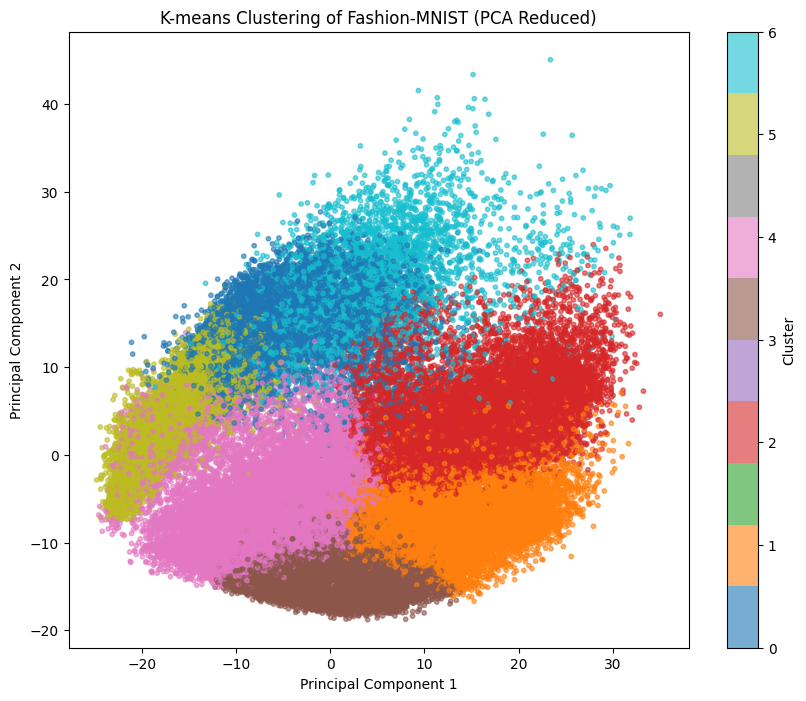

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=7, random_state=1, n_init=10)
kmeans.fit(X_pca)
y_pred = kmeans.predict(X_pca)

print(f"K-means inertia value: {kmeans.inertia_}")

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=10, cmap='tab10', alpha=0.6)
plt.title('K-means Clustering of Fashion-MNIST (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

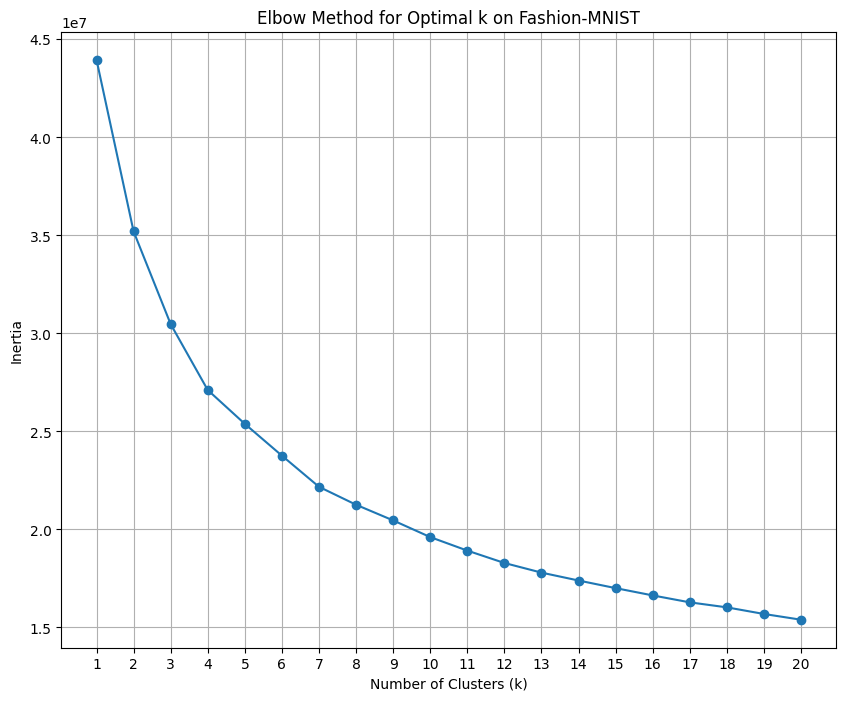

In [ ]:
distortions = []
K_range = range(1, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
    kmeans.fit(X_pca)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal k on Fashion-MNIST')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import seaborn as sns



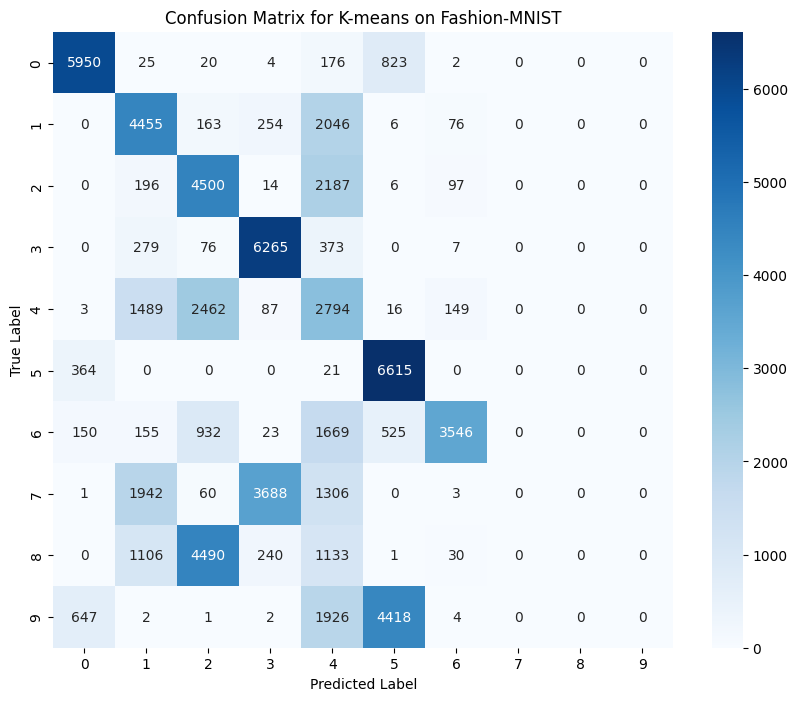

In [ ]:
cm_matched = get_best_matrix(confusion_matrix(y, y_pred), 10)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_matched, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-means on Fashion-MNIST')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3. Dimensionality reduction for Fashion-MNIST

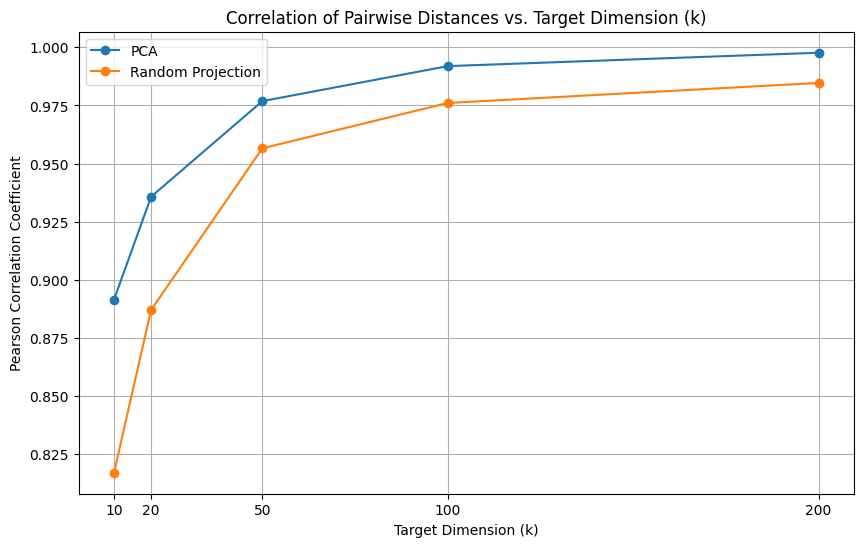

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_values = [10, 20, 50, 100, 200]

sample_size = 5000
np.random.seed(1)
sample_indices = np.random.choice(X_scaled.shape[0], size=sample_size, replace=False)
X_sample = X_scaled[sample_indices]

original_distances = pdist(X_sample)

pca_correlations = []
rp_correlations = []

for k in k_values:
    pca = PCA(n_components=k)
    X_pca_reduced = pca.fit_transform(X_scaled)
    X_pca_sample = X_pca_reduced[sample_indices]
    pca_reduced_distances = pdist(X_pca_sample)
    pca_corr, _ = pearsonr(original_distances, pca_reduced_distances)
    pca_correlations.append(pca_corr)

    rp = GaussianRandomProjection(n_components=k, random_state=1)
    X_rp_reduced = rp.fit_transform(X_scaled)
    X_rp_sample = X_rp_reduced[sample_indices]
    rp_reduced_distances = pdist(X_rp_sample)
    rp_corr, _ = pearsonr(original_distances, rp_reduced_distances)
    rp_correlations.append(rp_corr)


plt.figure(figsize=(10, 6))
plt.plot(k_values, pca_correlations, marker='o', linestyle='-', label='PCA')
plt.plot(k_values, rp_correlations, marker='o', linestyle='-', label='Random Projection')
plt.title('Correlation of Pairwise Distances vs. Target Dimension (k)')
plt.xlabel('Target Dimension (k)')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np

spectral_clustering = SpectralClustering(
    n_clusters=10,
    assign_labels='discretize',
    random_state=1,
    affinity='nearest_neighbors',
    n_neighbors=10,
    n_init=10
)
y_pred_spectral = spectral_clustering.fit_predict(X_pca)

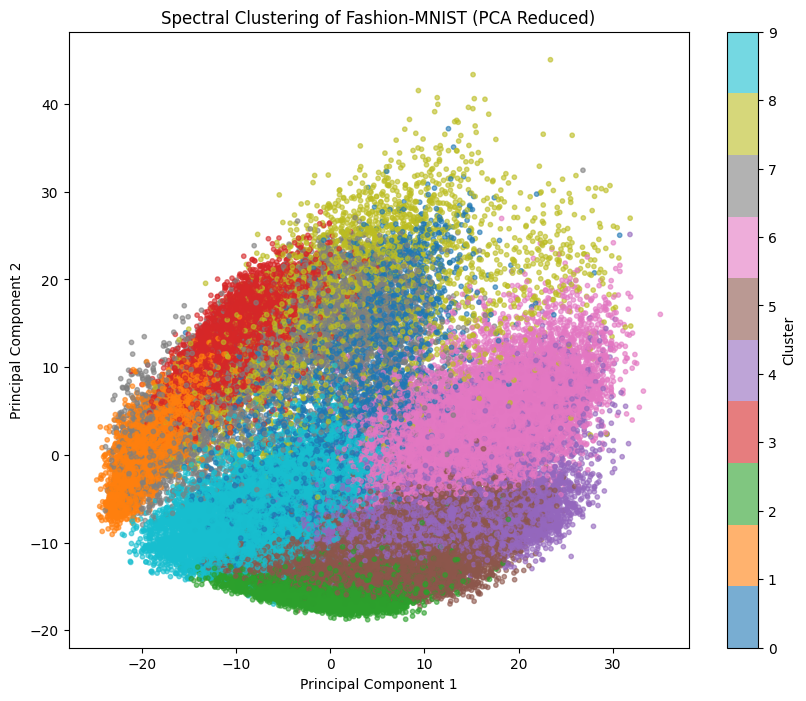

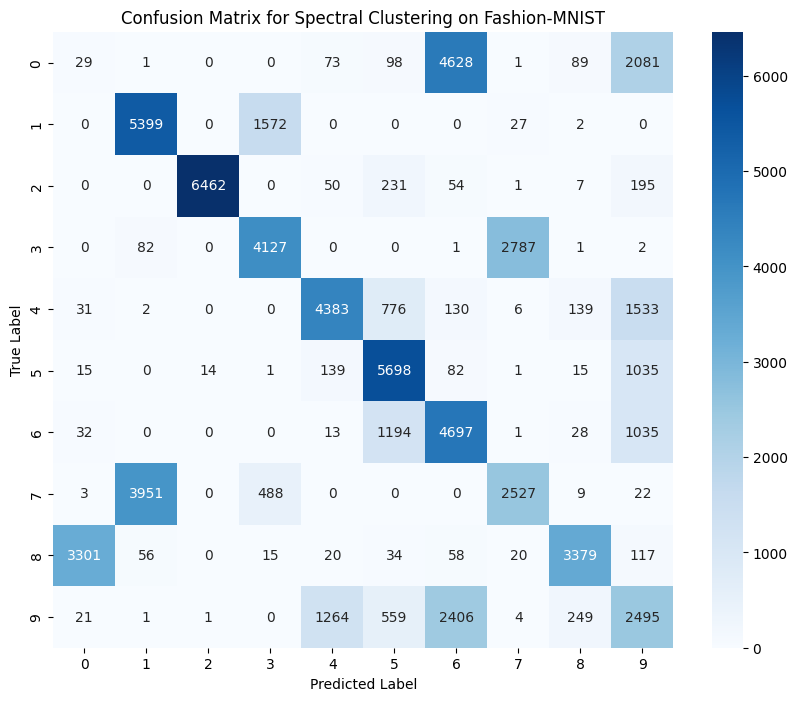

In [ ]:

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_spectral, s=10, cmap='tab10', alpha=0.6)
plt.title('Spectral Clustering of Fashion-MNIST (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

cm_spectral = get_best_matrix(confusion_matrix(y, y_pred_spectral), 10)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_spectral, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Spectral Clustering on Fashion-MNIST')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
print("K-means confusion matrix error", get_cm_score(cm_matched))
print("Spectral clustering confusion matrix error", get_cm_score(cm_spectral))